In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import load_config
import yfinance as yf
import numpy as np



class Var:
    def __init__(self,config):
        self.config = config


        
    def load_data(self):
        """
        Loads in data from yfinance
        """
        self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.stock_data = self.stock_data.dropna()
        return self.stock_data
    
    def get_returns(self):
        """
        Loads returns from yfinance
        """
            
        self.returns = self.stock_data.pct_change().dropna()
        return self.returns
    
    def get_var(self,ci=0.95):
        """
        value at risk
        """

        self.value_at_risk = np.percentile(self.returns,(1 - ci)*100)
        return self.value_at_risk
    
    def get_cvar(self,ci=0.95):
        """
        Conditional Value at Risk
        """



        tail_risk = self.returns[self.returns < self.value_at_risk]
        self.cvar = np.mean(tail_risk)
        return self.cvar
    
    def plot_returns(self):
        """
        Args:
          plots VaR, Returns, and cvar
          """

        print(f' Returns: {self.returns}')
        print(f'Value at Risk: {self.value_at_risk}')
        print(f'Conditional Value at Risk: {self.cvar:.4}%')
        plt.figure(figsize=(10, 6))
        plt.hist(self.returns, bins=100, label="Returns Distribution", alpha=0.7)
        plt.axvline(self.value_at_risk, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {self.value_at_risk:.4f}')
        plt.axvline(x=self.cvar, color='green', linestyle='--', label=f'CVaR ({self.cvar:.4f})')
        plt.title('Distribution of Returns and Value at Risk')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()


In [8]:
if __name__ == "__main__":
    config = load_config()
    var_config = Var(config)
    var_config.load_data()


/tmp/ipykernel_47964/2454005439.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  10 of 10 completed


In [9]:
var_config.get_returns()

Ticker,AAPL,F,GM,GOOGL,MCD,MSFT,SBUX,TGT,TSLA,WMT
Date,,,,,,,,,,
2020-10-26,0.000087,-0.015931,-0.027424,-0.029817,-0.019413,-0.028442,-0.012555,-0.014105,-0.000832,-0.011748
2020-10-27,0.013472,-0.013699,-0.025963,0.009209,-0.005797,0.015089,0.004350,-0.005951,0.010469,0.004994
2020-10-28,-0.046312,-0.027778,-0.022929,-0.055089,-0.037135,-0.049566,-0.031982,-0.011590,-0.043939,-0.019808
2020-10-29,0.037050,0.025974,0.023467,0.030500,0.001211,0.010065,0.012963,-0.006185,0.011847,-0.000857
2020-10-30,-0.056018,-0.021519,-0.010318,0.038044,-0.009072,-0.010991,-0.015175,-0.013160,-0.055473,-0.008362
...,...,...,...,...,...,...,...,...,...,...
2025-09-15,0.011236,0.000000,0.007692,0.044892,-0.010904,0.010708,0.009524,-0.015562,0.035611,0.001933
2025-09-16,0.006126,-0.005993,-0.008312,-0.001788,0.004039,-0.012263,0.020440,0.013099,0.028241,-0.002604
2025-09-17,0.003527,0.004307,0.004619,-0.006490,0.005539,0.001925,-0.013630,-0.008805,0.010056,0.008219


In [10]:
var_config.get_var()

np.float64(-0.032200049781684836)

In [11]:
var_config.get_cvar()

np.float64(-0.05016901938284847)

 Returns: Ticker          AAPL         F        GM     GOOGL       MCD      MSFT  \
Date                                                                     
2020-10-26  0.000087 -0.015931 -0.027424 -0.029817 -0.019413 -0.028442   
2020-10-27  0.013472 -0.013699 -0.025963  0.009209 -0.005797  0.015089   
2020-10-28 -0.046312 -0.027778 -0.022929 -0.055089 -0.037135 -0.049566   
2020-10-29  0.037050  0.025974  0.023467  0.030500  0.001211  0.010065   
2020-10-30 -0.056018 -0.021519 -0.010318  0.038044 -0.009072 -0.010991   
...              ...       ...       ...       ...       ...       ...   
2025-09-15  0.011236  0.000000  0.007692  0.044892 -0.010904  0.010708   
2025-09-16  0.006126 -0.005993 -0.008312 -0.001788  0.004039 -0.012263   
2025-09-17  0.003527  0.004307  0.004619 -0.006490  0.005539  0.001925   
2025-09-18 -0.004645  0.006861  0.009024  0.010019 -0.012559 -0.003078   
2025-09-19  0.032033 -0.010221 -0.004725  0.010673  0.004118  0.018645   

Ticker          SBUX       

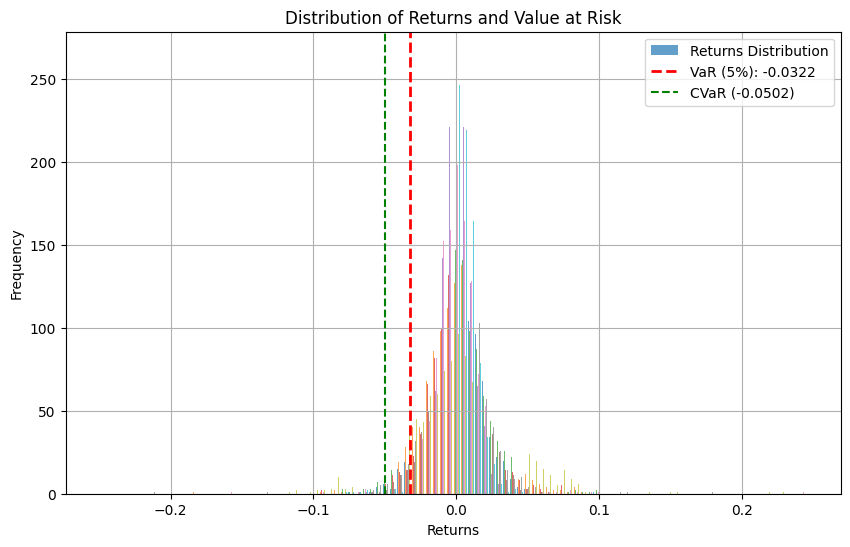

In [12]:
var_config.plot_returns()